In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

# For reproducibility
np.random.seed(42)

In [2]:
%cd ..
from accel.read_data import prep_data

/cdthome/xqe353


In [3]:
X_train, X_val, X_test, y_train, y_val, y_test, means_modes = prep_data("/cdtshared/wearables/students/group5/eliminated-missing-participants.csv",
                                                                        normalise = True,
                                                                        one_hot = True)

In [7]:
pca = PCA(n_components=100)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_val = pca.transform(X_val)
X_pca_test = pca.transform(X_test)

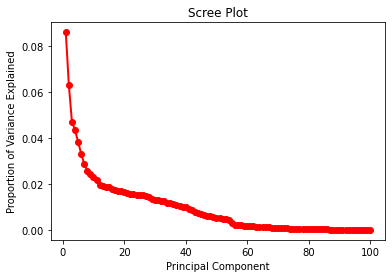

In [8]:
# Scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [9]:
# Select top 60 principal components
pca = PCA(n_components=60)
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
X_pca_val = pca.transform(X_val)
X_pca_test = pca.transform(X_test)

In [10]:
with open('/cdtshared/wearables/students/group5/XtrainPCAELLIE.pkl','wb') as f:
    pickle.dump(X_pca_train, f)
with open('/cdtshared/wearables/students/group5/XvalPCAELLIE.pkl','wb') as f:
    pickle.dump(X_pca_val, f)
with open('/cdtshared/wearables/students/group5/XtestPCAELLIE.pkl','wb') as f:
    pickle.dump(X_pca_test, f)
with open('/cdtshared/wearables/students/group5/ytrainPCAELLIE.pkl','wb') as f:
    pickle.dump(y_train, f)
with open('/cdtshared/wearables/students/group5/yvalPCAELLIE.pkl','wb') as f:
    pickle.dump(y_val, f)
with open('/cdtshared/wearables/students/group5/ytestPCAELLIE.pkl','wb') as f:
    pickle.dump(y_test, f)